In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

## Hundebestand von 2021 laden

In [3]:
df_hund21 = pd.read_csv('https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand/download/20210301_hundehalter.csv')
df_hund21

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,155048,41-50,w,10,101,Mischling gross,NaN,NaN,NaN,I,2019,m,grau/braun
1,119231,71-80,w,10,101,Golden Retriever,NaN,NaN,NaN,I,2011,w,golden
2,146137,41-50,w,10,101,Dalmatiner,NaN,NaN,NaN,I,2014,m,schwarz/weiss
3,83856,61-70,w,10,101,Tibet Terrier,NaN,NaN,NaN,K,2012,m,zobel
4,118377,31-40,m,10,101,Deutscher Schäfer,NaN,NaN,NaN,I,2013,w,grau
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8569,156044,21-30,w,9,92,Französische Bulldogge,NaN,NaN,NaN,K,2014,m,grau
8570,156020,31-40,m,9,92,Whippet,NaN,NaN,NaN,I,2020,w,sand/weiss
8571,81004,61-70,w,9,92,Mischling klein,NaN,NaN,NaN,K,2015,m,beige/schwarz
8572,126685,31-40,w,9,92,Barbet,NaN,NaN,NaN,I,2015,m,schwarz


## Anzahl Hunde pro Stadtkreis

Als Basis um die Werte besser abzuschätzen: Wieviele Hunde gibt es pro Stadtkreis?

In [4]:
# Anzahl Hunde pro Stadtkeis
df_kreis_agg = df_hund21.groupby(['STADTKREIS'], as_index=False).agg(anzahl_hunde_pro_kreis=('HALTER_ID', 'count'))
df_kreis_agg = df_kreis_agg.sort_values(by='STADTKREIS', ascending=[True])
df_kreis_agg

,STADTKREIS,anzahl_hunde_pro_kreis
0,1,130
1,2,836
2,3,767
3,4,450
4,5,290
5,6,596
6,7,1168
7,8,462
8,9,1065
9,10,758


## Aggregieren nach Stadtkreis und Rasse

Das Resultat zeigt wieviele Hunde jeder Rasse es pro Stadtkreis gibt.

In [5]:
df_hund_agg = df_hund21.groupby(['STADTKREIS', 'RASSE1'], as_index=False).agg(anzahl_hunde=('HALTER_ID', 'count'))
df_hund_agg = df_hund_agg.sort_values(by=['STADTKREIS', 'anzahl_hunde'], ascending=[True, False])
df_hund_agg

,STADTKREIS,RASSE1,anzahl_hunde
11,1,Chihuahua,8
26,1,Französische Bulldogge,8
39,1,Mischling klein,8
38,1,Mischling gross,7
32,1,Jack Russel Terrier,5
...,...,...,...
1668,12,Vorstehhund,1
1669,12,Welsh Springer Spaniel,1
1671,12,Windhund,1
1672,12,Wolfspitz,1


Jetzt behalten wir nur noch die Top 3 pro Stadtkreis:

In [6]:
# Top 3 beliebste Rasse pro Kreis
df_hund_agg.groupby('STADTKREIS').head(3).reset_index(drop=True)

,STADTKREIS,RASSE1,anzahl_hunde
0,1,Chihuahua,8
1,1,Französische Bulldogge,8
2,1,Mischling klein,8
3,2,Mischling klein,63
4,2,Chihuahua,58
5,2,Labrador Retriever,47
6,3,Mischling klein,68
7,3,Mischling gross,49
8,3,Labrador Retriever,48
9,4,Chihuahua,37


## Anzahl Hunde über die letzten Jahre

In [7]:
# Verlauf Anzahl Hunde in den letzten Jahren
df_hund20 = pd.read_csv('https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand/download/20200306_hundehalter.csv')
df_hund19 = pd.read_csv('https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand/download/20190304_hundehalter.csv')
df_hund18 = pd.read_csv('https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand/download/20180305_hundehalter.csv')
df_hund17 = pd.read_csv('https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand/download/20170308_hundehalter.csv')
df_hund16 = pd.read_csv('https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand/download/20160307_hundehalter.csv')

In [8]:
hunde_jahr = [
    {'jahr': 2016, 'anzahl': df_hund16['RASSE1'].count()},
    {'jahr': 2017, 'anzahl': df_hund17['RASSE1'].count()},
    {'jahr': 2018, 'anzahl': df_hund18['RASSE1'].count()},
    {'jahr': 2019, 'anzahl': df_hund19['RASSE1'].count()},
    {'jahr': 2020, 'anzahl': df_hund20['RASSE1'].count()},
    {'jahr': 2021, 'anzahl': df_hund21['RASSE1'].count()},
]
df_jahre = pd.DataFrame(hunde_jahr)
df_jahre

,jahr,anzahl
0,2016,6930
1,2017,7155
2,2018,7400
3,2019,7647
4,2020,7841
5,2021,8574


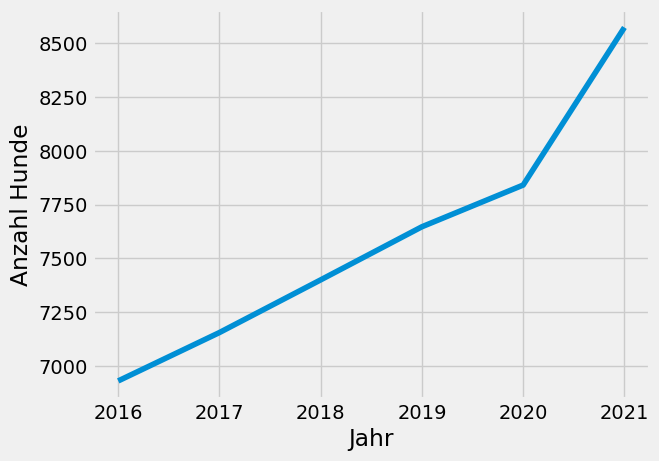

In [9]:
use_style('fivethirtyeight')
fig, ax = plt.subplots()
df_jahre.plot(kind='line', y='anzahl', x="jahr", label="Anzahl Hunde pro Jahr", ax=ax)
ax.legend().set_visible(False)
ax.set_ylabel('Anzahl Hunde')
ax.set_xlabel('Jahr')
plt.show()